<a href="https://colab.research.google.com/github/ashritakodali/kmc/blob/main/Final_assignment_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [1]:
! git clone https://www.github.com/DS3001/kmc

Cloning into 'kmc'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 25 (delta 4), reused 3 (delta 3), pack-reused 18
Receiving objects: 100% (25/25), 5.04 MiB | 15.94 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

In [27]:
# part 1:
airbnb = pd.read_csv('./kmc/data/airbnb_hw.csv')
airbnb.head()

df = airbnb.loc[:,['Price','Beds','Number Of Reviews','Review Scores Rating']]
df.head()
print(df.shape)
df.describe(include="all")

# cleaning price variable
df['Price'].value_counts()
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = pd.to_numeric(df['Price'],errors='coerce')

# cleaning bed variable
df['Beds'] = df['Beds'].fillna(1)

# cleaning the rating variable
df = df.dropna()
print(df.shape)
df.describe(include="all")

(30478, 4)
(22155, 4)


,Price,Beds,Number Of Reviews,Review Scores Rating
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [43]:
# part 2:
def maxmin(x):
    normalized = (x-min(x))/(max(x)-min(x))
    return normalized


normal_df = df.apply(maxmin)

In [44]:
# part 3:
normal_df = normal_df.drop("Price", axis=1)

model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0)
model = model.fit(normal_df)
normal_df['cluster'] = model.labels_
normal_df.describe()

,Beds,Number Of Reviews,Review Scores Rating,cluster
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.097312,0.060568,0.899915,1.476958
std,0.065205,0.094954,0.110630,1.659992
min,0.000000,0.000000,0.000000,0.000000
25%,0.062500,0.003906,0.862500,0.000000
50%,0.062500,0.023438,0.925000,1.000000
75%,0.125000,0.074219,1.000000,2.000000
max,1.000000,1.000000,1.000000,5.000000


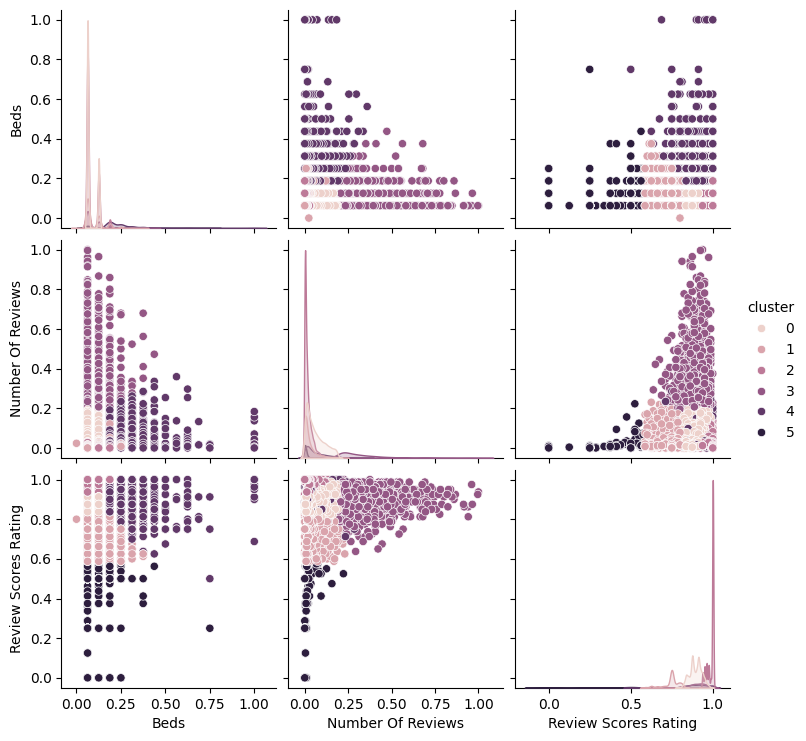

In [34]:
# part 4:
sns.pairplot(data=normal_df,hue='cluster')

In [36]:
# part 5:
df['cluster'] = model.labels_
df.loc[:,['Price','cluster'] ].groupby('cluster').describe()

Price                                                            
          count        mean         std   min    25%    50%    75%      max
cluster                                                                    
0        7489.0  136.487649   79.355269  22.0   82.0  120.0  175.0   1495.0
1        2875.0  131.788174  123.434199  20.0   70.0  109.0  165.0   5000.0
2        7847.0  154.004588  113.995579  10.0   85.0  130.0  195.0   3500.0
3        1771.0  135.083569   78.124649  27.0   85.0  120.0  170.0    875.0
4        1764.0  298.988662  352.290537  27.0  150.0  227.0  350.0  10000.0
5         409.0  129.951100  255.342268  25.0   60.0   90.0  150.0   5000.0

Price                                                           
           count        mean         std   min   25%    50%    75%      max
cluster                                                                    
0        10364.0  135.184002   93.702108  20.0  80.0  120.0  175.0   5000.0
1         7847.0  154.004588  113.995579  10.0  85.0  130.0  195.0   3500.0
2         3944.0  207.859787  267.771636  25.0  95.0  150.0  249.0  10000.0

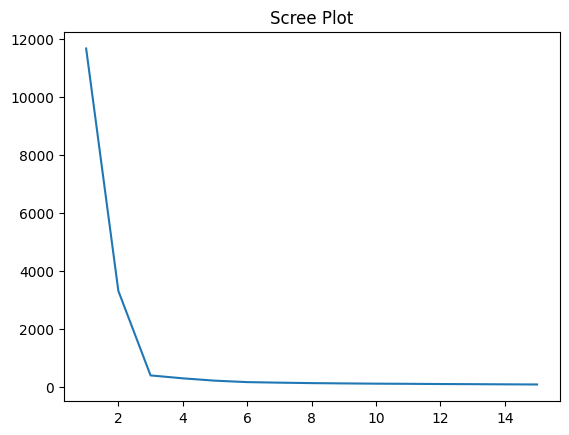

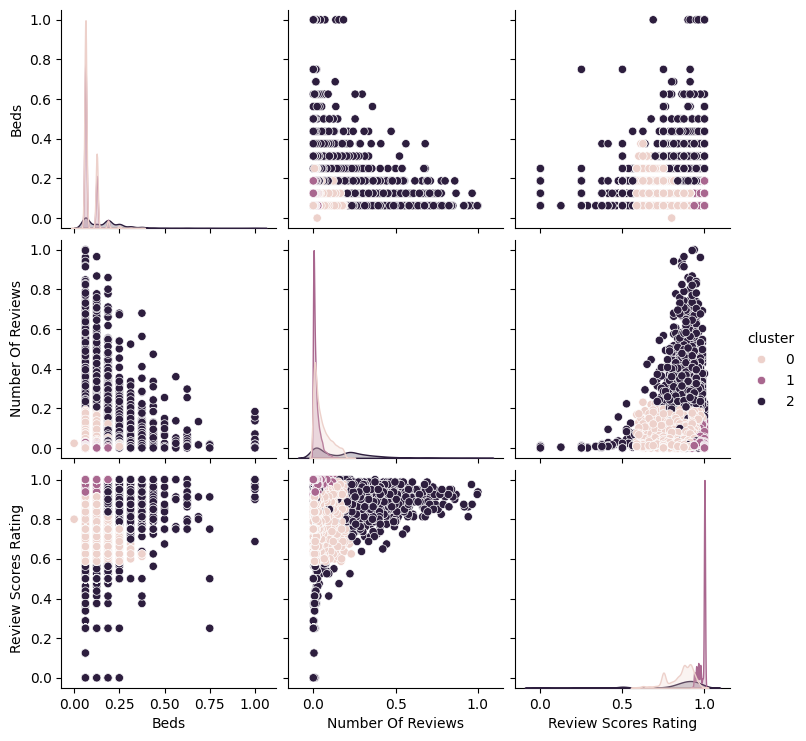

In [40]:
# part 6:
k_bar = 15
k_grid = np.arange(1,k_bar+1)
SSE = np.zeros(k_bar)
for k in range(k_bar):
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
    model = model.fit(normal_df)
    SSE[k] = model.inertia_

sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')

model = KMeans(n_clusters=3, max_iter=300, n_init = 10, random_state=0)
model = model.fit(normal_df)
normal_df['cluster'] = model.labels_

sns.pairplot(data=normal_df,hue='cluster')

df['cluster'] = model.labels_
df.loc[:,['Price','cluster'] ].groupby('cluster').describe()

5. Cluster 4 has the highest rental prices as the average rental price is 298, with a maximum of 10000.
6. It appears that a k value of 3 or 4 works best. When using a k value of 3, cluster 0 has the most reviews and the lowest average rental price. Cluster 1 has the second-most reviews and has the second-highest average rental price. Finally, cluster 3 has the least reviews, but it has the greatest average rental price.

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [46]:
# part 1:
def createData(noise,N=50):
    np.random.seed(100)
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

<Axes: xlabel='x1', ylabel='x2'>

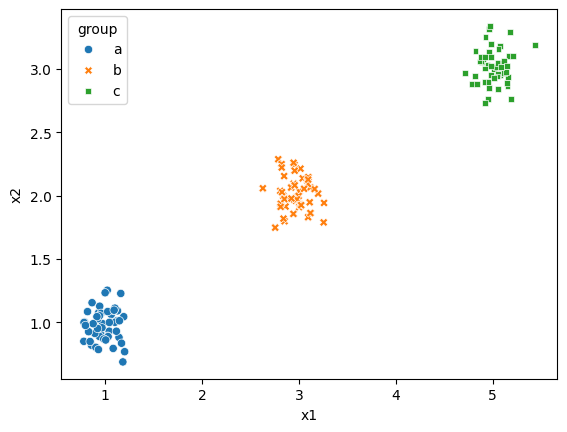

In [49]:
# part 2:
sns.scatterplot(data = df0_125, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

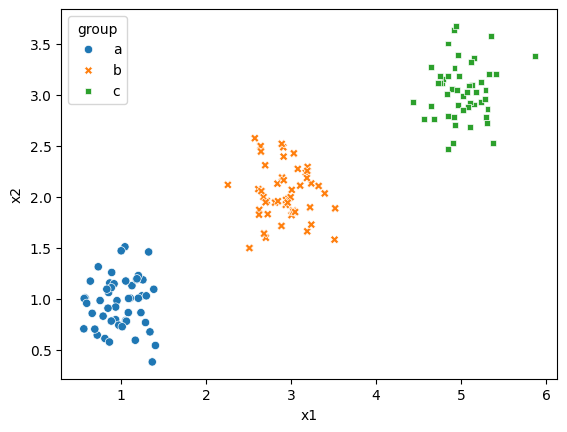

In [50]:
# part 2: cont
sns.scatterplot(data = df0_25, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

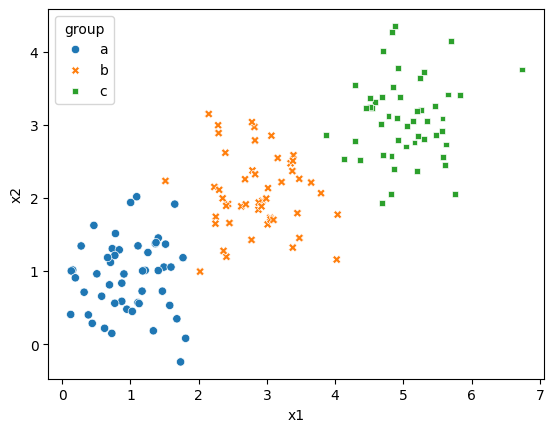

In [51]:
# part 2: cont
sns.scatterplot(data = df0_5, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

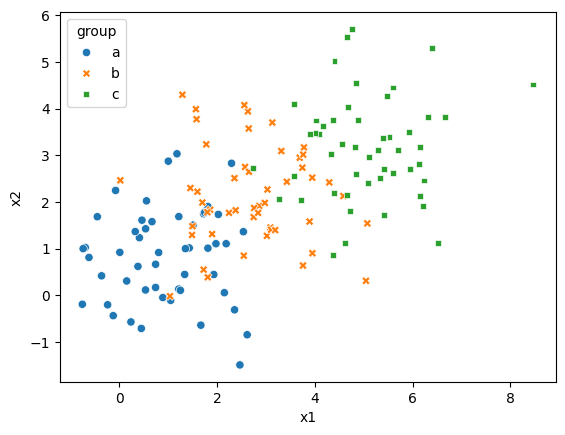

In [52]:
# part 2: cont
sns.scatterplot(data = df1_0, x = 'x1',y='x2',hue='group',style='group')

<Axes: xlabel='x1', ylabel='x2'>

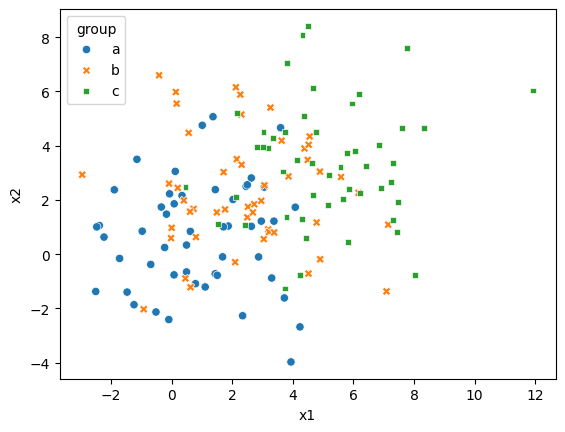

In [53]:
# part 2: cont
sns.scatterplot(data = df2_0, x = 'x1',y='x2',hue='group',style='group')

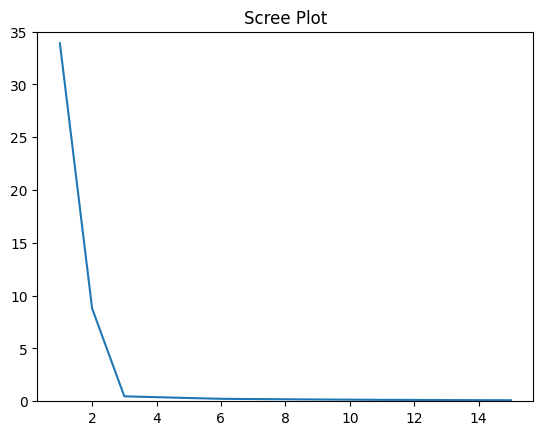

In [55]:
# part 3:
def scree(data):
    X = data.loc[ : , ['x1','x2'] ]
    X = X.apply(maxmin)
    # Create a scree plot:
    k_bar = 15
    k_grid = np.arange(1,k_bar+1)
    SSE = np.zeros(k_bar)
    for k in range(k_bar):
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0)
        model = model.fit(X)
        SSE[k] = model.inertia_
    scree_plot, axes = plt.subplots()
    sns.lineplot(x=k_grid, y=SSE).set_title('Scree Plot')
    axes.set_ylim(0, 35)

scree(data = df0_125)

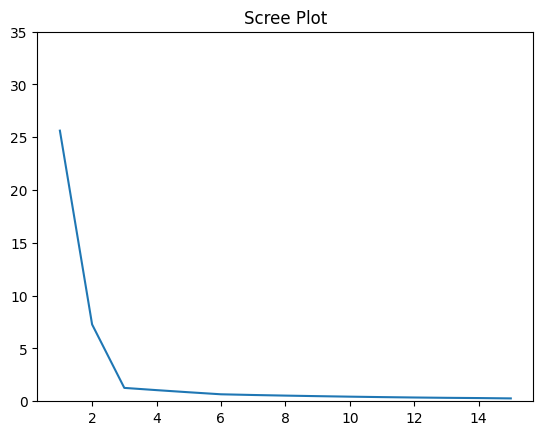

In [56]:
# part 3: cont
scree(data = df0_25)

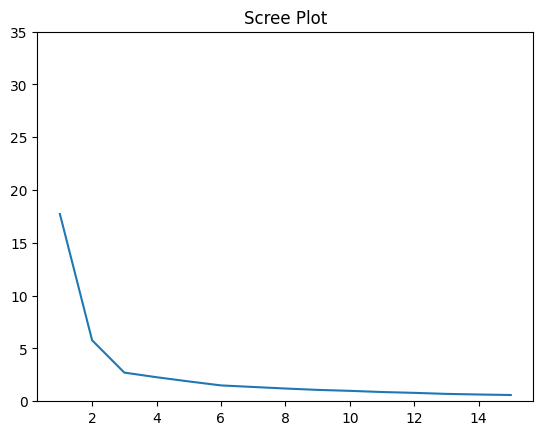

In [57]:
# part 3: cont
scree(data = df0_5)

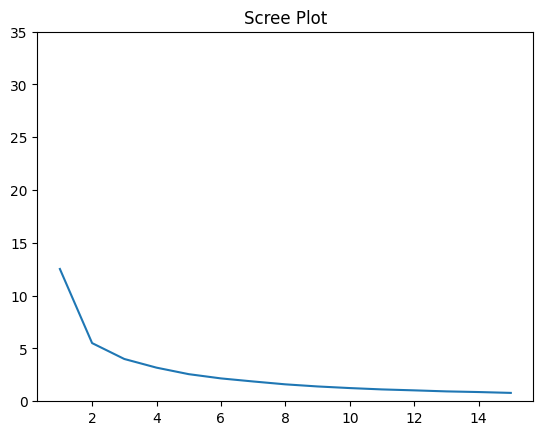

In [58]:
# part 3: cont
scree(data = df1_0)

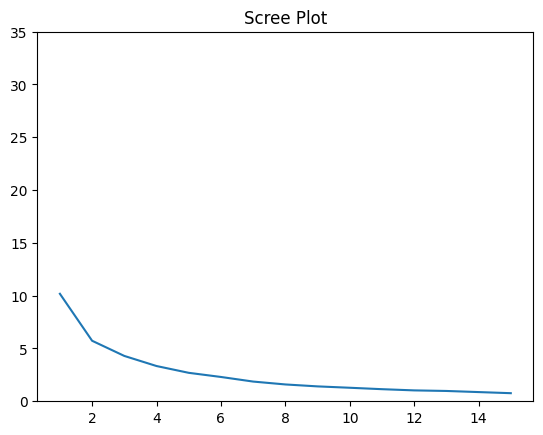

In [59]:
# part 3: cont
scree(data = df2_0)

2. As the noise increases, the distinctiveness of the clusters decreases. For instances, at noise = 0.125, the 3 clusters are grouped close to each other with minimal variability. However, the distinvtiveness of the clusters decreases because the variability of the clusters increases, meaning the points become more spread out. When noise equals 1, the points all have merged into one big cluster and lose their distinctiveness.
3. As the noise increases, the ability to choose an elbow and thus a k value will become harder and harder. When the noise value is smaller, there are clear distinct elbows that we can choose from. However, as the noise increases, the curve of the scree plot smoothens, making it increasingly difficult to select a elbow point and k-value.
4. When the noise is smaller, the groups were clearly distinct and separate frome each other with minimal variability. Adding another cluster will lead to significant drops in SSE. However, as the noise increases, the curve in the scree plot smoothens out. Adding additional clusters essentially have no effects in SSE as SSE almost remains constant regardless of the number of clusters there are. Furthermore, the scatterplots as the noise value increases become less and less distinct as the variability within the clusters is quite large, making the addition of another cluster ineffective as it will simply be merged into the large "overall" cluster.